In [26]:
!pip install matplotlib networkx spotipy


[notice] A new release of pip is available: 24.2 -> 24.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [27]:
# Download https://www.kaggle.com/api/v1/datasets/download/asaniczka/top-spotify-songs-in-73-countries-daily-updated and save it as spotify.csv
import os
import requests
import zipfile
import io

def download_file():

    # Check if the file already exists, if so, return
    if os.path.exists('spotify.csv'):
        print("Skipping download, file already exists")
        return

    print("Downloading file to spotify.csv")

    zipped_request = requests.get('https://www.kaggle.com/api/v1/datasets/download/asaniczka/top-spotify-songs-in-73-countries-daily-updated')
    unzipped_file = zipfile.ZipFile(io.BytesIO(zipped_request.content))

    # Extract the specific file from the zip archive and save it as spotify.csv
    for file_name in unzipped_file.namelist():
        if file_name.endswith('.csv'):
            with open('spotify.csv', 'wb') as f:
                f.write(unzipped_file.read(file_name))
            break

download_file()


Skipping download, file already exists


In [28]:
# Load the data from the file spotify.csv
import pandas as pd

data = pd.read_csv('spotify.csv')


In [29]:
# Print all columns
print(data.columns)
data.head()

Index(['spotify_id', 'name', 'artists', 'daily_rank', 'daily_movement',
       'weekly_movement', 'country', 'snapshot_date', 'popularity',
       'is_explicit', 'duration_ms', 'album_name', 'album_release_date',
       'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'time_signature'],
      dtype='object')


,spotify_id,name,artists,daily_rank,daily_movement,weekly_movement,country,snapshot_date,popularity,is_explicit,...,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,5vNRhkKd0yEAg8suGBpjeY,APT.,"ROSÉ, Bruno Mars",1,0,1,NaN,2024-11-27,98,False,...,0,-4.477,0,0.2600,0.0283,0.0,0.3550,0.939,149.027,4
1,2plbrEY59IikOBgBGLjaoe,Die With A Smile,"Lady Gaga, Bruno Mars",2,0,-1,NaN,2024-11-27,100,False,...,6,-7.777,0,0.0304,0.3080,0.0,0.1220,0.535,157.969,3
2,2CGNAOSuO1MEFCbBRgUzjd,luther (with sza),"Kendrick Lamar, SZA",3,0,47,NaN,2024-11-27,64,False,...,2,-7.546,1,0.1250,0.2510,0.0,0.2480,0.576,138.008,4
3,0nj9Bq5sHDiTxSHunhgkFb,squabble up,Kendrick Lamar,4,0,46,NaN,2024-11-27,86,True,...,0,-5.568,1,0.1980,0.0206,0.0,0.0783,0.711,103.921,4
4,0aB0v4027ukVziUGwVGYpG,tv off (feat. lefty gunplay),"Kendrick Lamar, Lefty Gunplay",5,1,45,NaN,2024-11-27,85,True,...,6,-6.679,0,0.2630,0.0837,0.0,0.4230,0.548,100.036,4


In [30]:
# Drop unnecessary columns
data = data.drop(columns=['daily_movement', 'weekly_movement'])

In [31]:
# Make a dataframe with for each column, (column name, number of values, number of unique values, mode, mean (if applicable), median (if applicable), standard deviation (if applicable), min (if applicable), max (if applicable), % missing values) 
summary = pd.DataFrame(columns=['column', 'number_of_values', 'number_of_unique_values', 'min', 'mode', 'mean', 'median', 'max', 'std', 'missing_values'])

numerical_columns = ["float64", "int64"]

for column in data.columns:
    number_of_values = len(data[column])
    number_of_unique_values = len(data[column].unique())
    mode = data[column].mode().values[0]
    mean = data[column].mean() if data[column].dtype in numerical_columns else None
    median = data[column].median() if data[column].dtype in numerical_columns else None
    std = data[column].std() if data[column].dtype in numerical_columns else None
    min_value = data[column].min() if data[column].dtype in numerical_columns else None
    max_value = data[column].max() if data[column].dtype in numerical_columns else None
    missing_values = data[column].isnull().sum() / number_of_values 
    data_type = data[column].dtype

    summary = pd.concat([summary, pd.DataFrame([{'column': column, 'number_of_values': number_of_values, 'number_of_unique_values': number_of_unique_values, 'mode': mode, 'mean': mean, 'median': median, 'std': std, 'min': min_value, 'max': max_value, 'missing_values': missing_values, 'data_type': data_type}])])

C:\Users\StijnLievaartChockab\AppData\Local\Temp\ipykernel_22548\4224162530.py:18: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  summary = pd.concat([summary, pd.DataFrame([{'column': column, 'number_of_values': number_of_values, 'number_of_unique_values': number_of_unique_values, 'mode': mode, 'mean': mean, 'median': median, 'std': std, 'min': min_value, 'max': max_value, 'missing_values': missing_values, 'data_type': data_type}])])
C:\Users\StijnLievaartChockab\AppData\Local\Temp\ipykernel_22548\4224162530.py:18: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old beh

In [32]:

# Print columns with missing_values > 0, in format (column_name, missing_values), (column_name, missing_values), ...
missing_values = summary[summary['missing_values'] > 0][['column', 'missing_values']]
missing_values = list(zip(missing_values['column'], missing_values['missing_values']))
missing_values = ', '.join([f'({column}, {round(missing_values*100000)/1000}%)' for column, missing_values in missing_values
])
print(missing_values)

summary


(name, 0.002%), (artists, 0.002%), (country, 1.363%), (album_name, 0.046%), (album_release_date, 0.035%)


,column,number_of_values,number_of_unique_values,min,mode,mean,median,max,std,missing_values,data_type
0,spotify_id,1468130,17814,None,6dOtVTDdiauQNBQEDOtlAB,NaN,NaN,None,NaN,0.000000,object
0,name,1468130,15841,None,Beautiful Things,NaN,NaN,None,NaN,0.000020,object
0,artists,1468130,10282,None,Sabrina Carpenter,NaN,NaN,None,NaN,0.000019,object
0,daily_rank,1468130,50,1,1,25.491843,25.000000,50,14.428844,0.000000,int64
0,country,1468130,73,None,DO,NaN,NaN,None,NaN,0.013628,object
0,snapshot_date,1468130,405,None,2024-03-16,NaN,NaN,None,NaN,0.000000,object
0,popularity,1468130,101,0,87,76.374753,80.000000,100,15.740339,0.000000,int64
0,is_explicit,1468130,2,None,False,NaN,NaN,None,NaN,0.000000,bool
0,duration_ms,1468130,13871,0,180304,192335.076384,184841.000000,939666,49450.334888,0.000000,int64
0,album_name,1468130,11886,None,HIT ME HARD AND SOFT,NaN,NaN,None,NaN,0.000456,object


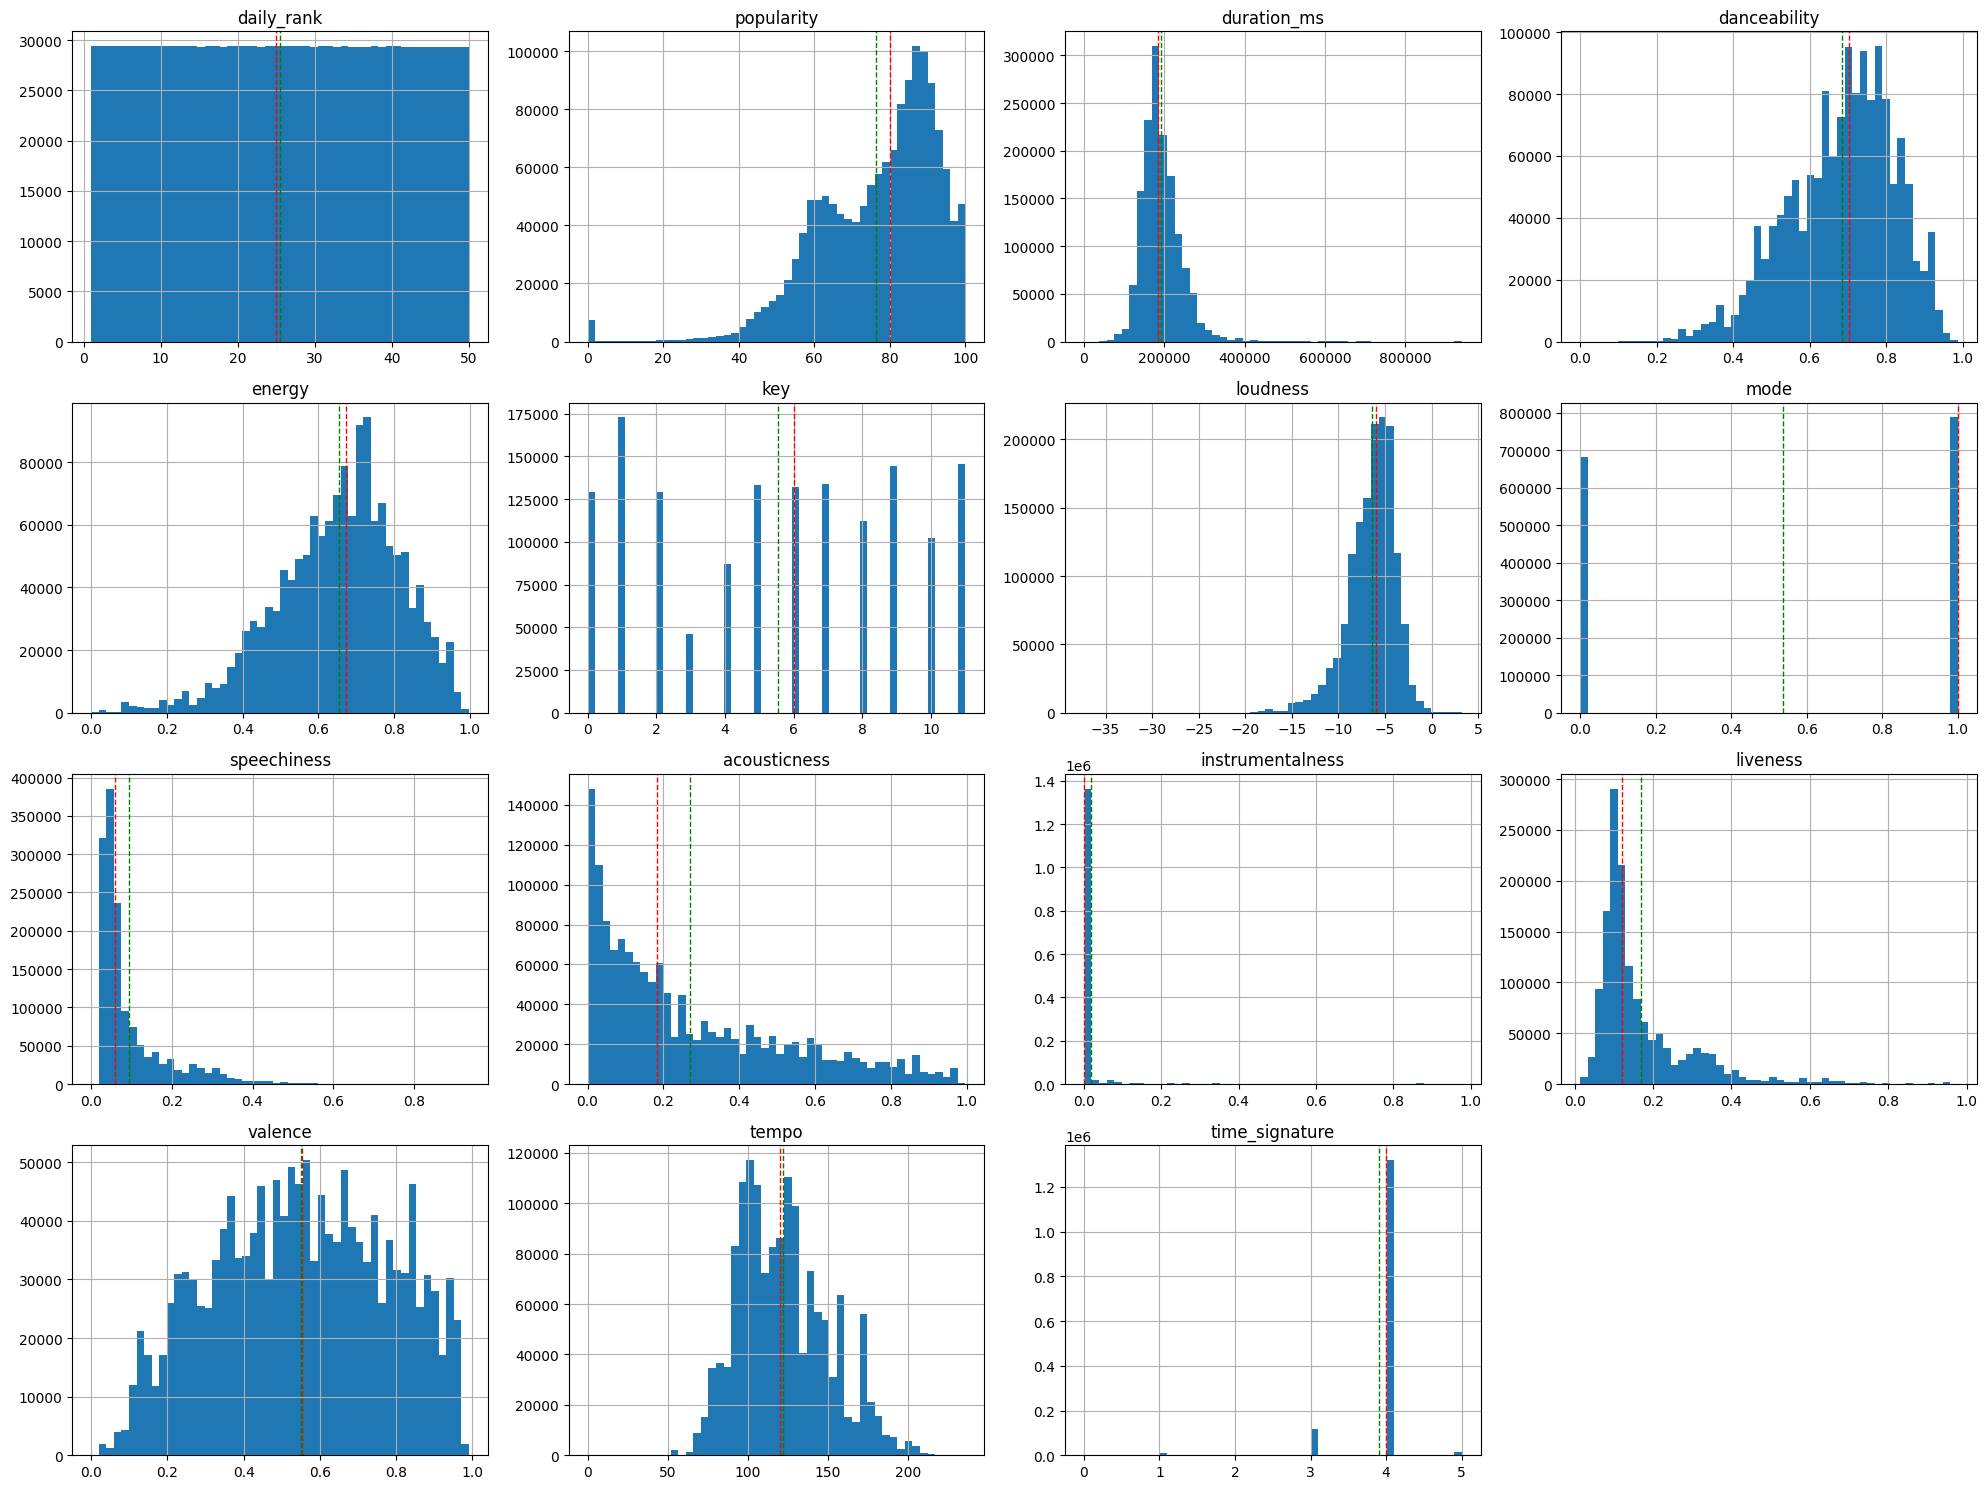

In [33]:
# For each column, plot a histogram
import matplotlib.pyplot as plt

# Plot histograms
axes = data.hist(bins=50, figsize=(20, 15))

# Add a line for the median
for ax in axes.flatten():
    column = ax.get_title()
    column_data = data.get(column)
    if column_data is None:
        continue
    if column_data.dtype in numerical_columns:
        ax.axvline(column_data.median(), color='r', linestyle='dashed', linewidth=1, label='Median')
        ax.axvline(column_data.mean(), color='g', linestyle='dashed', linewidth=1, label='Mean')

        ax.set_title(column)

plt.tight_layout()
plt.show()
    
    

# Determined data problems

- **Multiple arists for a single song**; When multiple artists are listed for a single song, this is done as "Artist One, Artist Two". Unfortunately, there is no difference for artists that have a comma in their name (e.g. "Earth, Wind & Fire"). This will be a problem when we try to split the artists into lists of artists.
- **Multiple songs for the same name**; When multiple songs have the same name, they go by the same name. Luckily we have the spotify_id to differentiate between the songs.
- **Missing values**; (name, 0.002%), (artists, 0.002%), (country, 1.363%), (album_name, 0.046%), (album_release_date, 0.035%). Name and artist are very rare and can be dropped. The country is empty because the song is in the top list of the global chart. The album name is empty because the song is not part of an album. The album release date is empty because the author did not provide it.
- **Deleted songs**; Some songs have been deleted from the Spotify database. The song ids are: 6IwmDRpswDujeciIBTiEOL


# Data enrichment 

In [34]:
# Use the spotify API to get:
# - Ids of artists
# - Genres of the artists and albums

import time
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials

# Load env
from dotenv import load_dotenv
import json

from tqdm import tqdm

load_dotenv()

# Get the credentials from the environment
client_id = os.environ.get('SPOTIPY_CLIENT_ID')
client_secret = os.environ.get('SPOTIPY_CLIENT_SECRET')

if client_id is None or client_secret is None:
    raise ValueError("Please set the SPOTIPY_CLIENT_ID and SPOTIPY_CLIENT_SECRET environment variables")

# Create the client
sp = spotipy.Spotify(auth_manager=SpotifyClientCredentials(client_id=client_id, client_secret=client_secret), retries=0)

distinct_songs = data['spotify_id'].unique()

# Get all tracks from the spotify API
cache_dir_songs = 'cache/songs/'
os.makedirs(cache_dir_songs, exist_ok=True)


# Get all tracks that are not in the cache

missing_songs = []
for song in distinct_songs:
    filename = f'{cache_dir_songs}{song}.json'
    if not os.path.exists(filename):
        missing_songs.append(song)
        continue

print(f"Getting data for {len(missing_songs)} songs ({len(distinct_songs) - len(missing_songs)} already in cache)")


for batch in tqdm(range(0, len(missing_songs), 50)):
    songs = missing_songs[batch:batch+50]
    response = None
    while(response is None or response['status'] != 200):
        try:
            songs_data = sp.tracks(songs)
            response = {'status': 200}
            time.sleep(0.5)
        except Exception as e:
            print(f"{e.http_status} {e.reason}, Headers: {e.headers}")
            retry_after = e.headers.get('Retry-After', None)
            if retry_after is None:
                print("No Retry-After header, waiting 60 seconds")
                time.sleep(60)
            else:
                print(f"Waiting {retry_after} seconds")
                time.sleep(int(retry_after))
            response = {'status': e.http_status}

    for song in songs_data['tracks']:
        if song is None:
            print("No data for song: ", song)
            continue
        filename = f'{cache_dir_songs}{song["id"]}.json'
        with open(filename, 'w') as f:
            json.dump(song, f)

Getting data for 1 songs (17813 already in cache)


100%|██████████| 1/1 [00:00<00:00,  1.71it/s]

No data for song:  None


In [35]:
# load all songs from the cache
songs = {}
for song in distinct_songs:
    filename = f'{cache_dir_songs}{song}.json'
    if not os.path.exists(filename):
        print(f"Missing song: {song}")
        continue
    with open(filename, 'r') as f:
        songs[song] = json.load(f)

unique_artists = set(artist['id'] for song in songs.values() for artist in song['artists'])

# Get all artists that are not in the cache
cache_dir_artists = 'cache/artists/'
os.makedirs(cache_dir_artists, exist_ok=True)

missing_artists = []
for artist in unique_artists:
    filename = f'{cache_dir_artists}{artist}.json'
    if not os.path.exists(filename):
        missing_artists.append(artist)
        continue
    
print(f"Getting data for {len(missing_artists)} artists ({len(unique_artists) - len(missing_artists)} already in cache)")

for batch in tqdm(range(0, len(missing_artists), 50)):
    artists = missing_artists[batch:batch+50]
    response = None
    while(response is None or response['status'] != 200):
        try:
            artists_data = sp.artists(artists)
            response = {'status': 200}  
            time.sleep(0.5)
        except Exception as e:
            print(f"{e.http_status} {e.reason}, Headers: {e.headers}")
            retry_after = e.headers.get('Retry-After', None)
            if retry_after is None:
                print("No Retry-After header, waiting 60 seconds")
                time.sleep(60)
            else:
                print(f"Waiting {retry_after} seconds")
                time.sleep(int(retry_after))
            response = {'status': e.http_status}

    for artist in artists_data['artists']:
        if artist is None:
            print("No data for artist: ", artist)
            continue
        filename = f'{cache_dir_artists}{artist["id"]}.json'
        with open(filename, 'w') as f:
            json.dump(artist, f)




Missing song: 6IwmDRpswDujeciIBTiEOL
Getting data for 0 artists (9709 already in cache)


0it [00:00, ?it/s]


In [37]:
# Make three csv files:
# - artists.csv with columns (followers, genres, external_urls, images, id, name, popularity)
# - songs.csv with columns (album_type, album_external_urls, album_id, album_images, album_name, album_release_date, album_total_tracks artist_ids, available_markets, external_urls, images, duration_ms, disc_number, explicit, id, name, popularity)
# - measurements.csv with columns (song_id, 
artists = []
for artist in unique_artists:
    filename = f'{cache_dir_artists}{artist}.json'
    if not os.path.exists(filename):
        print(f"Missing artist: {artist}")
        continue
    with open(filename, 'r') as f:
        artist = json.load(f)
        artists.append(artist)


    
artists = pd.DataFrame(artists)

# Make directory
os.makedirs('output', exist_ok=True)
artists.to_csv('output/artists.csv', index=False)

# Get the song chracteristics from the original dataset. Make a mapper from song id to song characteristics
distinct_songs_data = data.copy().drop_duplicates(subset=['spotify_id'])
song_id_to_characteristics = distinct_songs_data.set_index('spotify_id').to_dict(orient='index')


songs = []
for song in distinct_songs:
    filename = f'{cache_dir_songs}{song}.json'
    if not os.path.exists(filename):
        print(f"Missing song: {song}")
        continue
    with open(filename, 'r') as f:
        song = json.load(f)
        
        # Also append song characterstics (found in the original dataset) ("danceability","energy","key","loudness","mode","speechiness","acousticness","instrumentalness","liveness","valence","tempo","time_signature")
        for column in ["danceability","energy","key","loudness","mode","speechiness","acousticness","instrumentalness","liveness","valence","tempo","time_signature"]:
            song[column] = song_id_to_characteristics[song['id']][column]
        
        
        songs.append(song)

songs = pd.DataFrame(songs)
songs.to_csv('output/songs.csv', index=False)






Missing song: 6IwmDRpswDujeciIBTiEOL
